# Visualização de Dados

### Titanic

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic/train.csv')

In [2]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
data.columns = ['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosConjuge',
       'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']

In [4]:
data.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.Sexo.replace({'male': 'homem', 'female': 'mulher'}, inplace=True)

In [6]:
data.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S


Aqui em baixo é para trazermos apenas a primeira letra de cada item da cabine. Se nao for nulo traz o proprio valor

In [7]:
data['Cabine'] = data['Cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

### Matplotlib

In [8]:
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib
%matplotlib inline

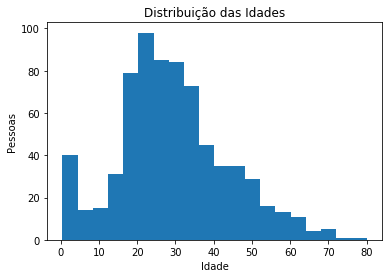

In [9]:
plt.hist(data.Idade.dropna(), bins=20)  # Para criar o histograma da idade. Lembrando que o dropna remove os itens faltantes na coluna
# O bins em cima é o tanto de divisoes que queremos que apareça no histograma
plt.title('Distribuição das Idades')  # Para colocar um tilulo
plt.ylabel('Pessoas')  # Descrição em Y
plt.xlabel('Idade')  # Descrição em X

plt.show()  # Para mostrar somente o histograma sem aquele monte de mensagens

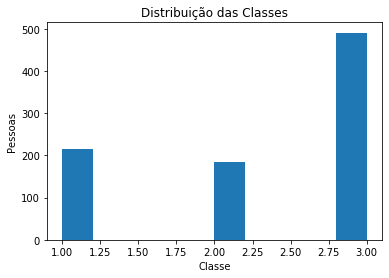

In [10]:
plt.hist(data.Classe, bins=10)
plt.title('Distribuição das Classes')
plt.ylabel('Pessoas')
plt.xlabel('Classe')

plt.show()

### Subplots - 1ª Forma

Abaixo podemos ver colocando 2 histogramas juntos

C:\Users\Arakaki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Arakaki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


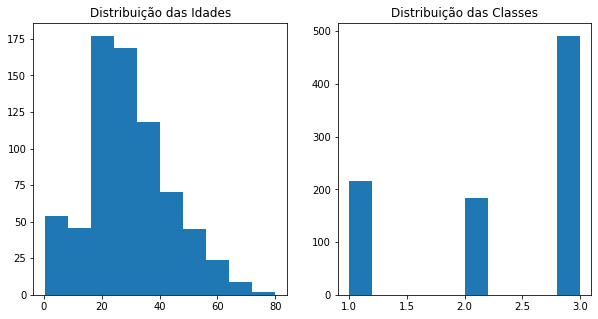

In [11]:
plt.figure(figsize=(10,5))  # Tamanho dos quadrados. ele enxerga todas as figuras a baixo como 1 figura unica. Nao obrigatorio
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, plot 1
plt.hist(data.Idade)
plt.title('Distribuição das Idades')

plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, plot 2
plt.hist(data.Classe)
plt.title('Distribuição das Classes')

plt.show()

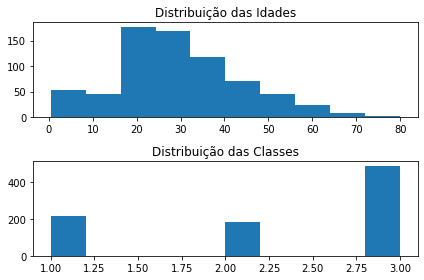

In [12]:
plt.subplot(2, 1, 1)  # 2 linhas, 1 coluna, plot 1
plt.hist(data.Idade)
plt.title('Distribuição das Idades')

plt.subplot(2, 1, 2)  # 2 linhas, 1 coluna, plot 2
plt.hist(data.Classe)
plt.title('Distribuição das Classes')

plt.tight_layout()  # Como aqui eu coloquei 2 linhas e 1 coluna, ficou apertado, para isso usamos esse comando para separar

plt.show()

### Subplots - 2ª Forma

In [13]:
# dpi é a resolução da imagem

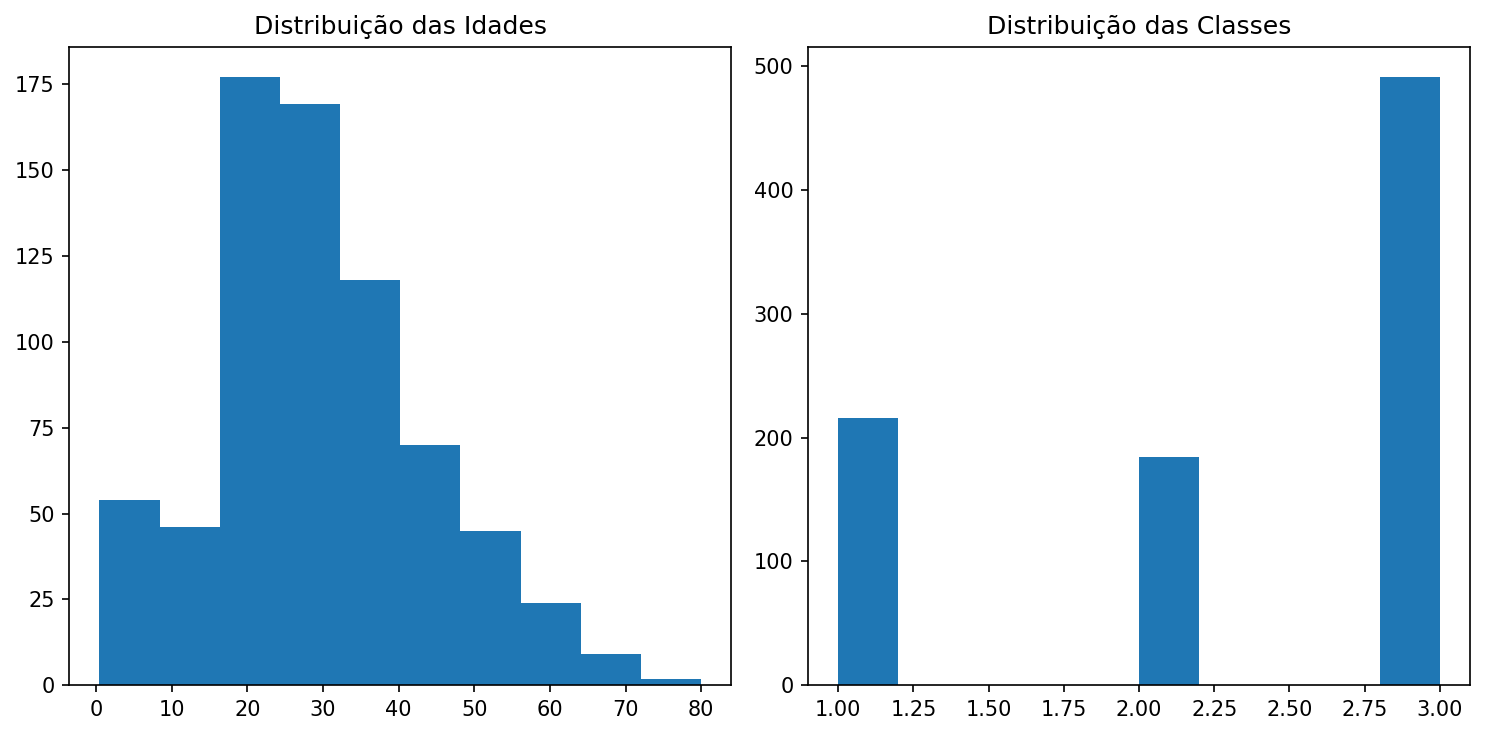

In [14]:
f, ax = plt.subplots(1,2, figsize=(10,5), dpi = 150)  # f = figure, ax = axis (poderia ser qualquer nome) | 1 linhas, 2 colunas

# O [0] ou [1] indica qual histograma pegar. É como se fosse uma lista
ax[0].hist(data.Idade.dropna())
ax[0].set_title('Distribuição das Idades')

ax[1].hist(data.Classe.dropna())
ax[1].set_title('Distribuição das Classes')

plt.tight_layout()
plt.show()

### Seaborn

In [15]:
import seaborn as sns  # É uma biblioteca que auxilia na visualização de graficos mais bonitos

In [16]:
data.Sobreviveu.value_counts()

0    549
1    342
Name: Sobreviveu, dtype: int64

In [17]:
data.Sexo.value_counts()

homem     577
mulher    314
Name: Sexo, dtype: int64

In [18]:
data.Classe.value_counts()

3    491
1    216
2    184
Name: Classe, dtype: int64

### pie e countplot

- explode - Coloca uma distancia entre os dados [cima, baixo]
- ax=ax[0] - é qual slot do grafico usar, nesse caso o indice 0
- autopct - mostra o percentual

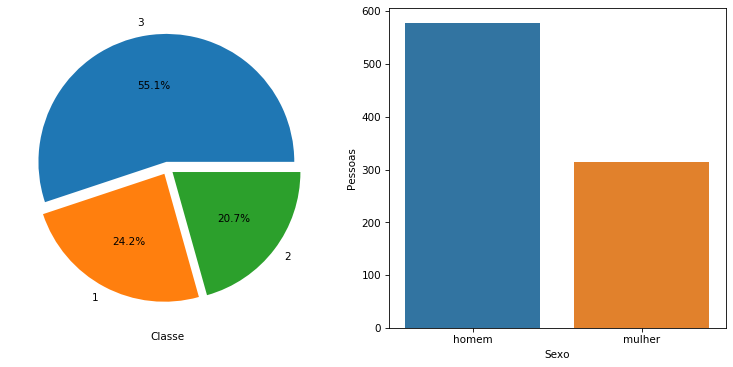

In [19]:
f, ax = plt.subplots(1,2, figsize=(10,5), dpi=75)
# data.Sobreviveu.value_counts().plot.pie(ax=ax[0], explode=[0.05,0.0], autopct='%0.2f%%')  # So demonstrando
data.Classe.value_counts().plot.pie(ax=ax[0], explode=[0.05,0.05,0.05], autopct='%0.1f%%')  # no explode coloquei 3, porque é quantos dados tem em Classe
ax[0].set_xlabel('Classe')
ax[0].set_ylabel('')

sns.countplot('Sexo', data=data, ax=ax[1])
ax[1].set_ylabel('Pessoas')

plt.tight_layout()
plt.show()

### countplot  e hue

O hue serve para comparar no mesmo grafico, o que colocar com hue fica destacado em cima com uma legenda. Ex a baixo

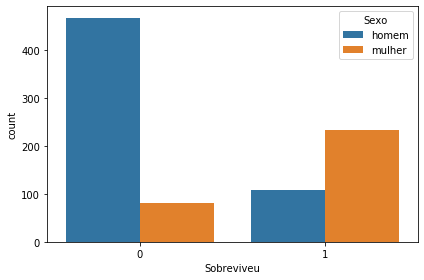

In [20]:
sns.countplot('Sobreviveu', hue='Sexo', data=data)

plt.tight_layout()
plt.show()

### boxplot

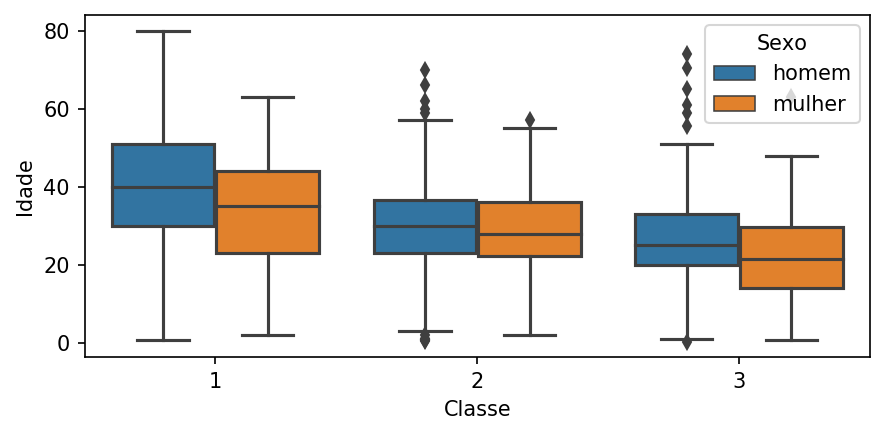

In [21]:
plt.figure(figsize=(6,3), dpi=150)
sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=data)

plt.tight_layout()
plt.show()

### violinplot

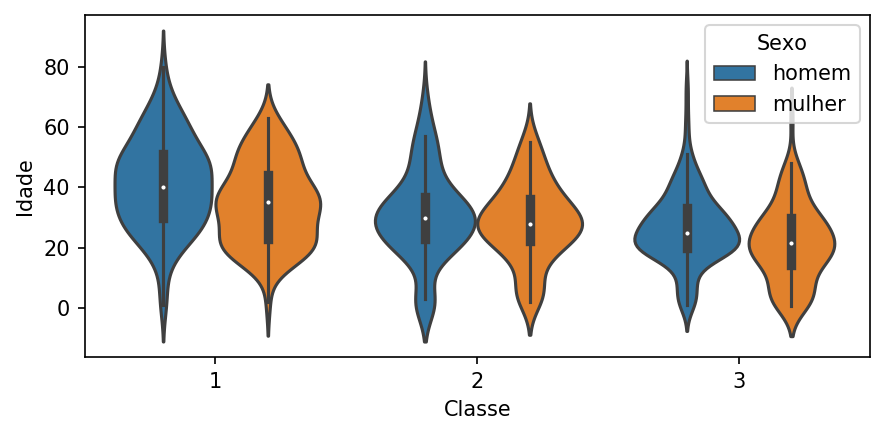

In [22]:
plt.figure(figsize=(6,3), dpi=150)
sns.violinplot(x='Classe', y='Idade', hue='Sexo', data=data)

plt.tight_layout()
plt.show()

### FacetGrid com hist

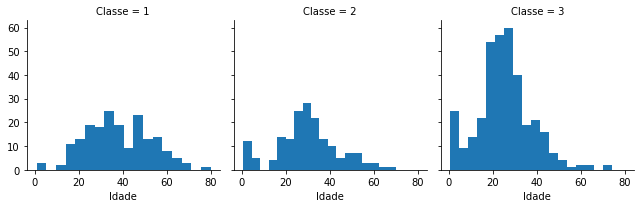

In [23]:
g = sns.FacetGrid(data, col='Classe')  # O col automaticamente cria a quantidade necessaria de itens dentro da coluna
g.map(plt.hist, 'Idade', bins=18)

plt.tight_layout()
plt.show()

### FacetGrid com barplot

- O alpha deixa mais claro a cor
- ci é o intervalo de confiança

C:\Users\Arakaki\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


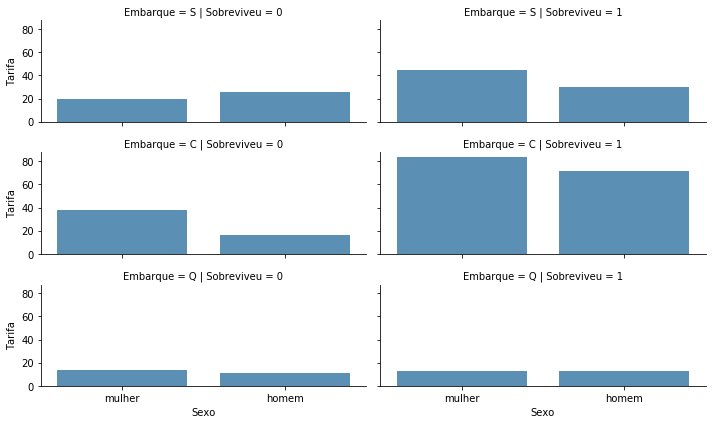

In [24]:
g = sns.FacetGrid(data, row='Embarque', col='Sobreviveu')
g.map(sns.barplot, 'Sexo', 'Tarifa', alpha=0.8, ci=None)

fig = plt.gcf()
fig.set_size_inches(10,6)

plt.tight_layout()
plt.show()

### FacetGrid com distplot

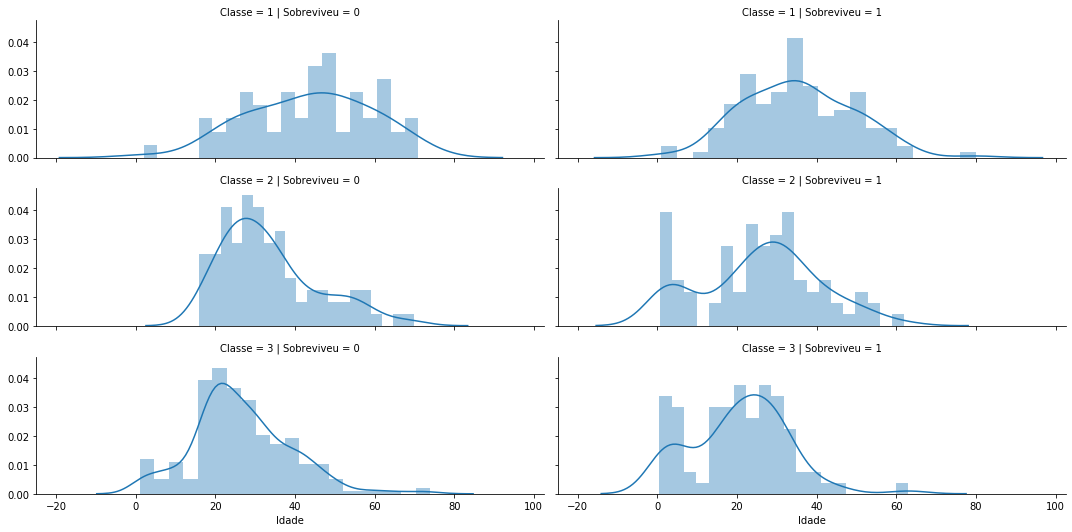

In [25]:
g = sns.FacetGrid(data, col='Sobreviveu', row='Classe', height=2.5, aspect=3)  # aspect nesse caso é tipo a largura
g.map(sns.distplot, 'Idade', bins=20)  # distplot só recebe 1 valor

### catplot do tipo "point"

- O ponto mostra a media e a linha é o intervalo de confiança (ci)
- Podemos observar que o ic do embarque c e q sao muito maiores, isso porque temos poucos dados, como pode ser visto na linha a baixo do grafico

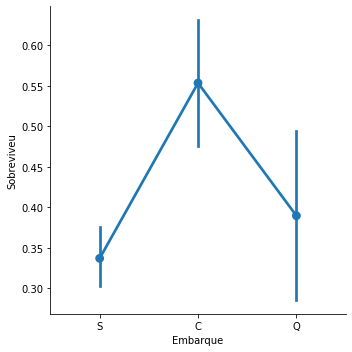

In [26]:
sns.catplot('Embarque', 'Sobreviveu', data=data, kind='point')

In [27]:
data.Embarque.value_counts()

S    644
C    168
Q     77
Name: Embarque, dtype: int64

### FacetGrid com pointplot

C:\Users\Arakaki\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Arakaki\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


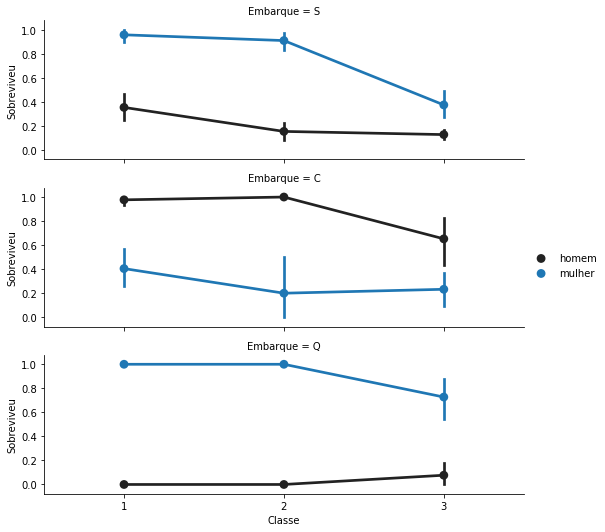

In [28]:
g = sns.FacetGrid(data, row='Embarque', height=2.5, aspect=3)
g.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo')
g.add_legend()

### heatmap

In [29]:
data.isnull().sum()  # Quantos dados nulos nós temos em cada coluna

IdPassageiro       0
Sobreviveu         0
Classe             0
Nome               0
Sexo               0
Idade            177
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Cabine           687
Embarque           2
dtype: int64

- yticklabels=False - é uma barra lateral esquerda que mostra os numeros
- cbar - é a barra da direita
- cmap - é a cor dos risquinhos

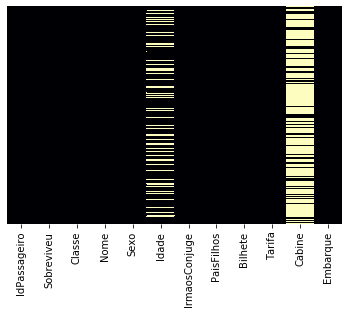

In [30]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')

### relplot

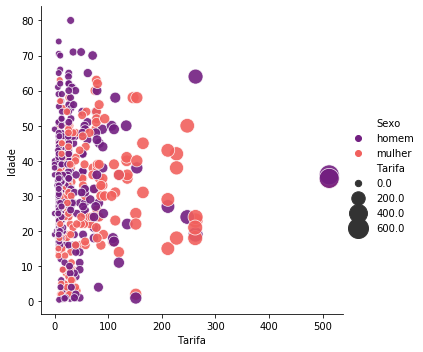

In [31]:
sns.relplot(x='Tarifa', y='Idade', hue='Sexo', data=data, size='Tarifa', sizes=(40,400), alpha=0.9, palette='magma')

### scatterplot

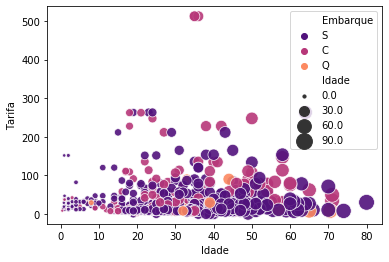

In [32]:
sns.scatterplot(x='Idade', y='Tarifa', hue='Embarque', data=data, size='Idade', sizes=(10,250), alpha=0.9, palette='magma')

### pairplot

In [1]:
# sns.pairplot(data)  # Se colocarmos assim ele da todas as opçoes de graficos

C:\Users\Arakaki\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Arakaki\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Arakaki\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Arakaki\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


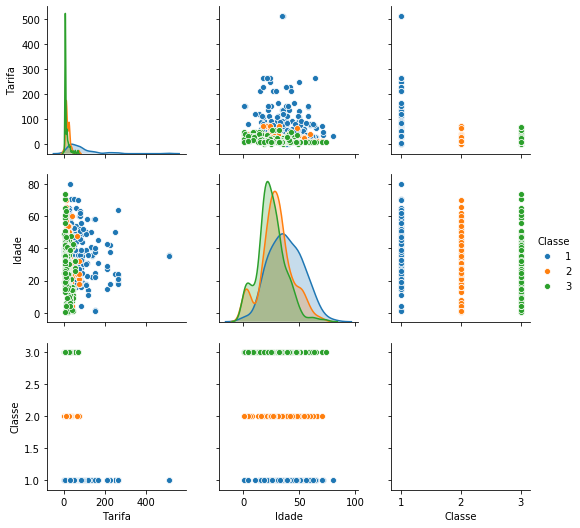

In [34]:
sns.pairplot(data[['Tarifa','Idade', 'Classe']], hue='Classe')  # Da para escolhermos o que queremos dessa maneira
plt.show()

### jointplot tipo "kde"

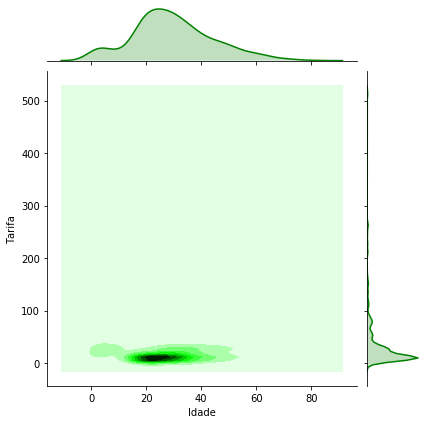

In [35]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='kde', color='g')  # Mostra a intensidade da correlação entre 2 colunas

### jointplot tipo "reg"

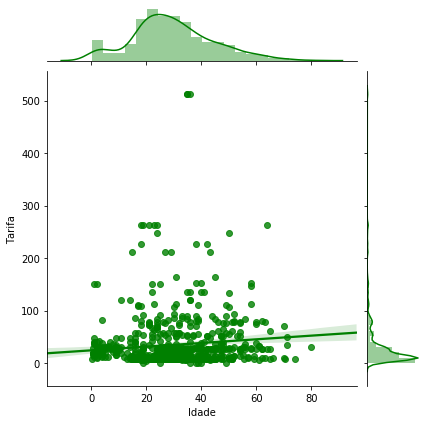

In [36]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='reg', color='g')

### kdeplot

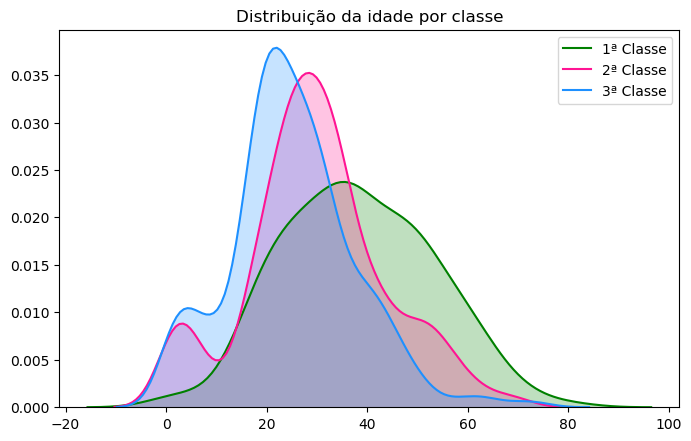

In [37]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data['Idade'].loc[data['Classe']==1], shade=True, color='g', label='1ª Classe')
sns.kdeplot(data['Idade'].loc[data['Classe']==2], shade=True, color='deeppink', label='2ª Classe')
sns.kdeplot(data['Idade'].loc[data['Classe']==3], shade=True, color='dodgerblue', label='3ª Classe')

plt.title('Distribuição da idade por classe')

plt.show()

### catplot do tipo "count"

- col_wrap - Separa os histogramas para nao ficar tudo na mesma linha

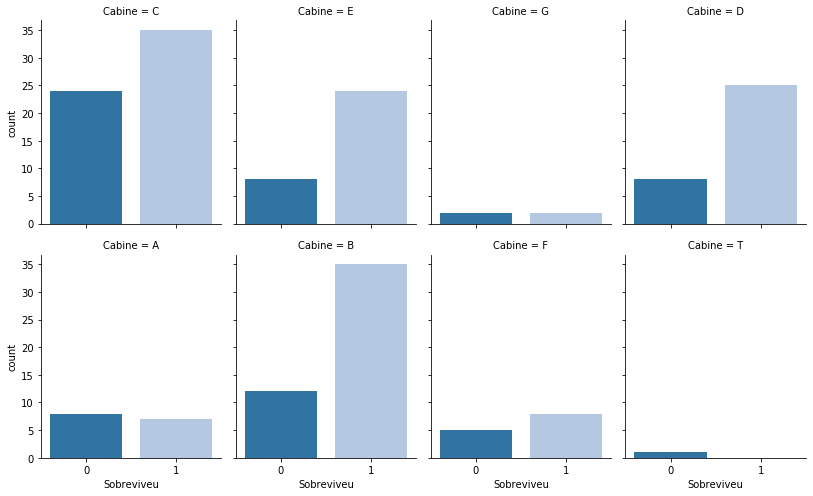

In [38]:
sns.catplot('Sobreviveu', col='Cabine', data=data[['Sobreviveu', 'Cabine']].dropna(), kind='count', height=3.5, aspect=0.8,
           col_wrap=4, palette='tab20')

### heatmap corr()

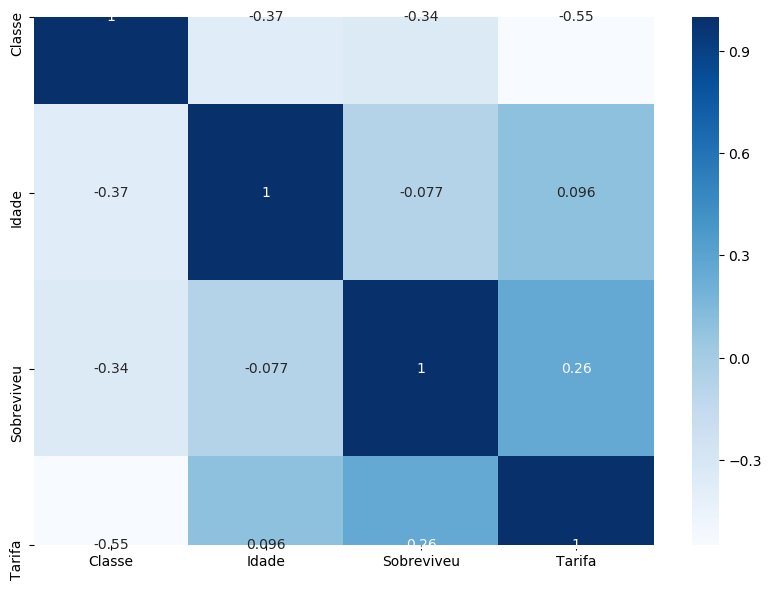

In [39]:
plt.figure(figsize=(10,7), dpi=100)

sns.heatmap(data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque']].corr(), cmap='Blues', annot=True)

### plot

In [40]:
x = np.random.normal(10,1,15)  # 15 elementos, media 10, 1 de desvio padrao | Sao dados criados artificiais

In [41]:
x

array([11.38523641, 11.25259204,  8.34930771,  8.54501377, 10.89077281,
        9.82254107, 11.18679163, 10.78746687, 11.22489866,  7.36097647,
        8.45867976,  9.81499571,  9.47309837,  9.458216  , 10.65805323])

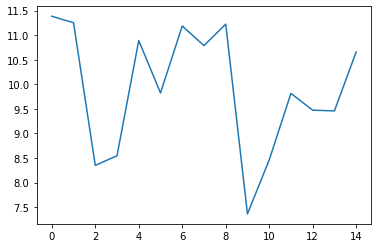

In [42]:
plt.plot(x)

### linspace

In [43]:
x = np.linspace(0,20,1000)  # Cria 1000 elementos com o intervalor entre 0 e 20

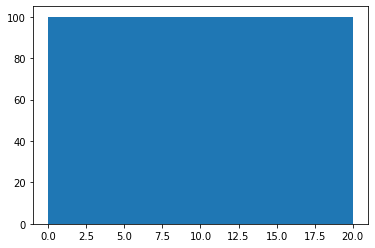

In [44]:
plt.hist(x)
plt.show()

In [45]:
y = 2*x - 5  # Equação do primeiro grau

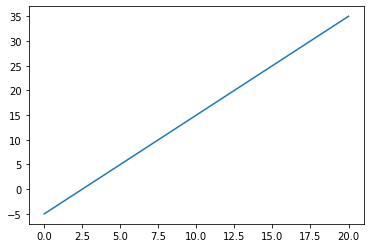

In [46]:
plt.plot(x,y)
plt.show()

In [47]:
y = 2*x**2 + 3*x - 5  # Equação do segundo grau

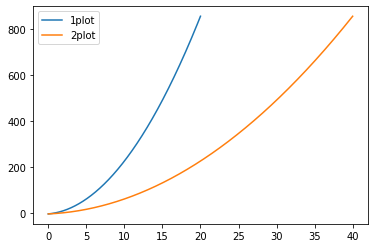

In [48]:
plt.plot(x,y, label='1plot')
plt.plot(x*2,y, label='2plot')  # Só multipliquei o x por 2 para criar dois graficos

plt.legend()
plt.show()